# Portfolio Risk Calculation

*   Defines a dictionary of stocks with their respective weights in the portfolio.
*   Specifies the period for which historical data is required.
*   Downloads the historical adjusted closing prices from Yahoo Finance.
*   Computes daily returns for each stock and then calculates the daily portfolio returns based on the weights.
*   Calculates the mean and standard deviation of the daily portfolio returns.
*   Determines the VaR at the specified confidence level using both the percentile method and the parametric method (assuming a normal distribution).
*   Prints out the calculated VaR.
*   Finally, it plots the cumulative returns of the portfolio over the specified period.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm



In [2]:
# Define the stocks in our portfolio and their respective weights
portfolio_stocks = {
    'AAPL': 0.3,  # 30% of the portfolio
    'MSFT': 0.2,  # 20% of the portfolio
    'GOOG': 0.2,  # 20% of the portfolio
    'AMZN': 0.3   # 30% of the portfolio
}



In [3]:
# Define the time period for historical data
start_date = '2020-01-01'
end_date = '2023-11-03'

# Fetch the historical data from Yahoo Finance
data = yf.download(list(portfolio_stocks.keys()), start=start_date, end=end_date)['Adj Close']



[*********************100%%**********************]  4 of 4 completed


In [6]:
data.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-01-02,73.059425,94.900497,68.368500,154.493851
2020-01-03,72.349152,93.748497,68.032997,152.570084
2020-01-06,72.925636,95.143997,69.710503,152.964462
2020-01-07,72.582672,95.343002,69.667000,151.569809
2020-01-08,73.750259,94.598503,70.216003,153.984024


In [7]:
data.tail()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-27,167.784576,127.739998,123.400002,328.534424
2023-10-30,169.849197,132.710007,125.750000,336.005402
2023-10-31,170.327972,133.089996,125.300003,336.802307
2023-11-01,173.519684,137.000000,127.570000,344.731537
2023-11-02,177.110382,138.070007,128.580002,346.972839


In [4]:
# Calculate daily returns
returns = np.log(1+data.pct_change()).dropna()



In [5]:
returns

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-01-03,-0.009769,-0.012213,-0.004919,-0.012530
2020-01-06,0.007937,0.014776,0.024358,0.002582
2020-01-07,-0.004714,0.002089,-0.000624,-0.009159
2020-01-08,0.015958,-0.007839,0.007850,0.015803
2020-01-09,0.021018,0.004788,0.010984,0.012416
...,...,...,...,...
2023-10-27,0.007938,0.066095,-0.000324,0.005839
2023-10-30,0.012230,0.038169,0.018865,0.022486
2023-10-31,0.002815,0.002859,-0.003585,0.002369


In [5]:
# Calculate portfolio returns by multiplying stock returns with their respective weights
portfolio_returns = returns.dot(np.array(list(portfolio_stocks.values())))



In [6]:
portfolio_returns

Date
2020-01-03   -0.010116
2020-01-06    0.010982
2020-01-07   -0.003869
2020-01-08    0.009530
2020-01-09    0.013184
                ...   
2023-10-27    0.017287
2023-10-30    0.021822
2023-10-31    0.001410
2023-11-01    0.021932
2023-11-02    0.011222
Length: 966, dtype: float64

In [7]:
# Calculate the mean and standard deviation of daily portfolio returns
mean_returns = portfolio_returns.mean()
sigma_returns = portfolio_returns.std()



In [8]:
# Set the confidence level
confidence_level = 0.05

# Calculate VaR using the percentile method
VaR = np.percentile(portfolio_returns, confidence_level * 100)



In [9]:
# Calculate VaR using the parametric method (assuming normal distribution)
VaR_parametric = norm.ppf(confidence_level, mean_returns, sigma_returns)

# Print the results
print(f"Portfolio VaR (percentile method) at {confidence_level * 100}% confidence level: {VaR * 100:.2f}%")
print(f"Portfolio VaR (parametric method) at {confidence_level * 100}% confidence level: {VaR_parametric * 100:.2f}%")



Portfolio VaR (percentile method) at 5.0% confidence level: -2.97%
Portfolio VaR (parametric method) at 5.0% confidence level: -3.10%


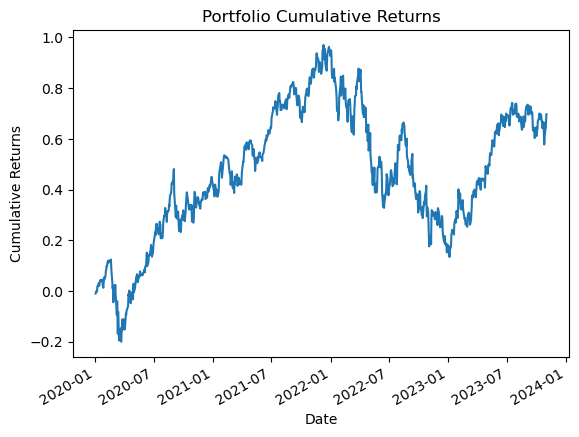

In [10]:
# Plot the portfolio cumulative returns
import matplotlib.pyplot as plt

cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.plot()
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


* In practice, financial returns may not follow a normal distribution, and therefore, using the parametric method with normal distribution assumptions might not be accurate.

* In such cases, alternative approaches like Historical Simulation or Monte Carlo Simulation could be employed for a better estimate of VaR.

* Fetches historical stock data over a two-year period to ensure we have a robust dataset.
* Calculates the covariance matrix of the stock returns, which is critical for assessing how the stocks move together.
* Runs a Monte Carlo simulation with 10,000 iterations, simulating the portfolio returns for each day over the next trading year (252 days). This creates a distribution of possible ending portfolio values after a year.
* Uses this distribution to calculate the 95% VaR and CVaR, giving us the value at risk and the expected shortfall (average of the worst 5% of outcomes).
* Visualizes the results with a histogram and lines indicating the VaR and CVaR.

In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt



In [12]:
# Define the stocks and their respective weights in our portfolio
portfolio_stocks = {
    'AAPL': 0.3,
    'MSFT': 0.2,
    'GOOG': 0.2,
    'AMZN': 0.3
}



In [13]:
# Define the time period for historical data
start_date = '2020-01-01'
end_date = '2023-11-03'

# Fetch the historical data from Yahoo Finance
data = yf.download(list(portfolio_stocks.keys()), start=start_date, end=end_date)['Adj Close']



[*********************100%%**********************]  4 of 4 completed


In [14]:
# Calculate daily returns
returns = np.log(1+data.pct_change()).dropna()

# Calculate the covariance matrix on daily returns
cov_matrix = returns.cov()



In [15]:
cov_matrix

,AAPL,AMZN,GOOG,MSFT
AAPL,0.000462,0.000325,0.000319,0.000350
AMZN,0.000325,0.000580,0.000347,0.000343
GOOG,0.000319,0.000347,0.000456,0.000344
MSFT,0.000350,0.000343,0.000344,0.000435


In [16]:
# Simulate 10,000 potential future portfolio returns using Monte Carlo simulation
num_simulations = 10000
num_days = 252  # Approximate number of trading days in a year
simulated_portfolios = np.zeros(num_simulations)



In [17]:
# Assuming 'num_simulations' and 'num_days' are defined earlier
# 'portfolio_stocks' should be a dictionary where keys are stock symbols and values are the weights

# Convert portfolio weights to a numpy array
weights = np.array(list(portfolio_stocks.values()))

# Initialize array to store simulated portfolio values
simulated_portfolios = np.zeros(num_simulations)



In [19]:
simulated_portfolios

array([0.27497615, 0.057049  , 0.1001579 , ..., 0.25863134, 0.21597302,
       0.43463673])

In [18]:
for i in range(num_simulations):
    # Randomly sample from a normal distribution for each stock
    simulated_rets = np.random.multivariate_normal(returns.mean().values, cov_matrix, num_days)

    # Calculate the daily portfolio returns by multiplying the simulated returns with the weights
    # Here, we sum across the columns (axis=1) after multiplying each day's returns by the weights
    daily_portf_returns = np.sum((simulated_rets * weights), axis=1)

    # Cumulative sum to simulate the daily returns
    simulated_portf_values = np.cumsum(daily_portf_returns)

    # Store the final simulated portfolio value
    simulated_portfolios[i] = simulated_portf_values[-1]




In [20]:
# Calculate VaR and CVaR
confidence_level = 0.05
VaR_95 = np.percentile(simulated_portfolios, 100 * confidence_level)
CVaR_95 = simulated_portfolios[simulated_portfolios <= VaR_95].mean()



In [21]:
# Print the results
print(f"Portfolio VaR at {confidence_level * 100}% confidence level: {VaR_95:.2f}")
print(f"Portfolio CVaR at {confidence_level * 100}% confidence level: {CVaR_95:.2f}")



Portfolio VaR at 5.0% confidence level: -0.31
Portfolio CVaR at 5.0% confidence level: -0.44


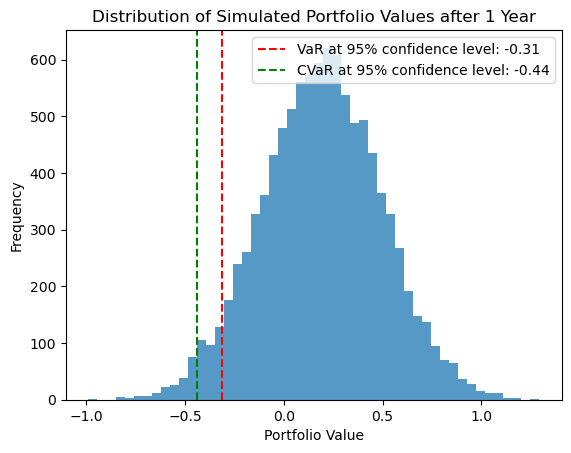

In [22]:
# Plot the distribution of simulated portfolio values
plt.hist(simulated_portfolios, bins=50, alpha=0.75)
plt.axvline(x=VaR_95, color='r', linestyle='--', label=f'VaR at 95% confidence level: {VaR_95:.2f}')
plt.axvline(x=CVaR_95, color='g', linestyle='--', label=f'CVaR at 95% confidence level: {CVaR_95:.2f}')
plt.title('Distribution of Simulated Portfolio Values after 1 Year')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Stress Testing and Scenario Analysis

* Define a set of stress scenarios.
* Apply the scenarios to the historical data to see the impact.
* Evaluate the portfolio's performance under these scenarios.

In [23]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime



In [24]:
# Define the tickers we are interested in
tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]

# Fetch historical data from Yahoo Finance
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Define a portfolio, evenly distributed across our assets
portfolio_weights = np.array([1/len(tickers)] * len(tickers))

# Calculate portfolio returns
portfolio_returns = returns.dot(portfolio_weights)



[*********************100%%**********************]  4 of 4 completed


In [25]:
# Stress scenarios (e.g., market crash, interest rate spike)
# Scenarios are defined as a dictionary with {name: returns_multiplier}
scenarios = {
    'Market Crash': -0.5,  # 50% reduction in asset prices
    'Interest Rate Hike': -0.05,  # 5% decrease in prices due to interest rates
    'Tech Bubble Burst': {'AAPL': -0.3, 'MSFT': -0.25, 'GOOG': -0.4, 'AMZN': -0.35}  # Tech-specific crash
}



In [26]:
# Function to apply stress scenario to portfolio returns
def apply_stress_scenario(returns, scenario, tickers):
    stressed_returns = returns.copy()
    if isinstance(scenario, dict):
        # Apply stress scenario to each asset
        for ticker, multiplier in scenario.items():
            print(scenario.items)
            stressed_returns[ticker] = stressed_returns[ticker] + np.abs(stressed_returns[ticker])*multiplier
    else:
        stressed_returns *= scenario
    return stressed_returns



In [27]:
# Apply each scenario and calculate stressed portfolio value
initial_investment = 100000  # Initial portfolio investment
stressed_portfolio_values = {}

for name, scenario in scenarios.items():
    stressed_returns = apply_stress_scenario(returns, scenario, tickers)
    stressed_portfolio_returns = stressed_returns.dot(portfolio_weights)
    stressed_portfolio_values[name] = (stressed_portfolio_returns + 1).cumprod() * initial_investment



<built-in method items of dict object at 0x0000025CAB7DE0C0>
<built-in method items of dict object at 0x0000025CAB7DE0C0>
<built-in method items of dict object at 0x0000025CAB7DE0C0>
<built-in method items of dict object at 0x0000025CAB7DE0C0>


In [28]:
returns

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-01-03,-0.009722,-0.012139,-0.004907,-0.012452
2020-01-06,0.007968,0.014886,0.024657,0.002585
2020-01-07,-0.004703,0.002092,-0.000624,-0.009118
2020-01-08,0.016086,-0.007809,0.007880,0.015928
2020-01-09,0.021241,0.004799,0.011044,0.012493
...,...,...,...,...
2024-03-12,0.002779,0.019946,0.004894,0.026599
2024-03-13,-0.012123,0.006671,0.008237,-0.000433
2024-03-14,0.010927,0.012404,0.025360,0.024380


In [29]:
stressed_returns

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-01-03,-0.012639,-0.016388,-0.006870,-0.015565
2020-01-06,0.005578,0.009676,0.014794,0.001939
2020-01-07,-0.006114,0.001360,-0.000874,-0.011398
2020-01-08,0.011260,-0.010542,0.004728,0.011946
2020-01-09,0.014868,0.003119,0.006627,0.009370
...,...,...,...,...
2024-03-12,0.001945,0.012965,0.002936,0.019950
2024-03-13,-0.015759,0.004336,0.004942,-0.000542
2024-03-14,0.007649,0.008062,0.015216,0.018285


In [30]:
# Convert the results to a DataFrame for easy viewing
stressed_portfolio_values_df = pd.DataFrame(stressed_portfolio_values)



In [31]:
stressed_portfolio_values_df

,Market Crash,Interest Rate Hike,Tech Bubble Burst
Date,,,
2020-01-03,100490.258050,100049.025805,98713.452182
2020-01-06,99860.985444,99986.374845,99502.829194
2020-01-07,100015.187644,100001.814427,99079.310149
2020-01-08,99614.047490,99961.705776,99510.136726
2020-01-09,98996.724287,99899.758006,100355.581836
...,...,...,...
2024-03-12,56841.004940,94903.797311,1209.420244
2024-03-13,56824.296799,94901.007659,1207.296792
2024-03-14,56305.269488,94814.326050,1222.150339


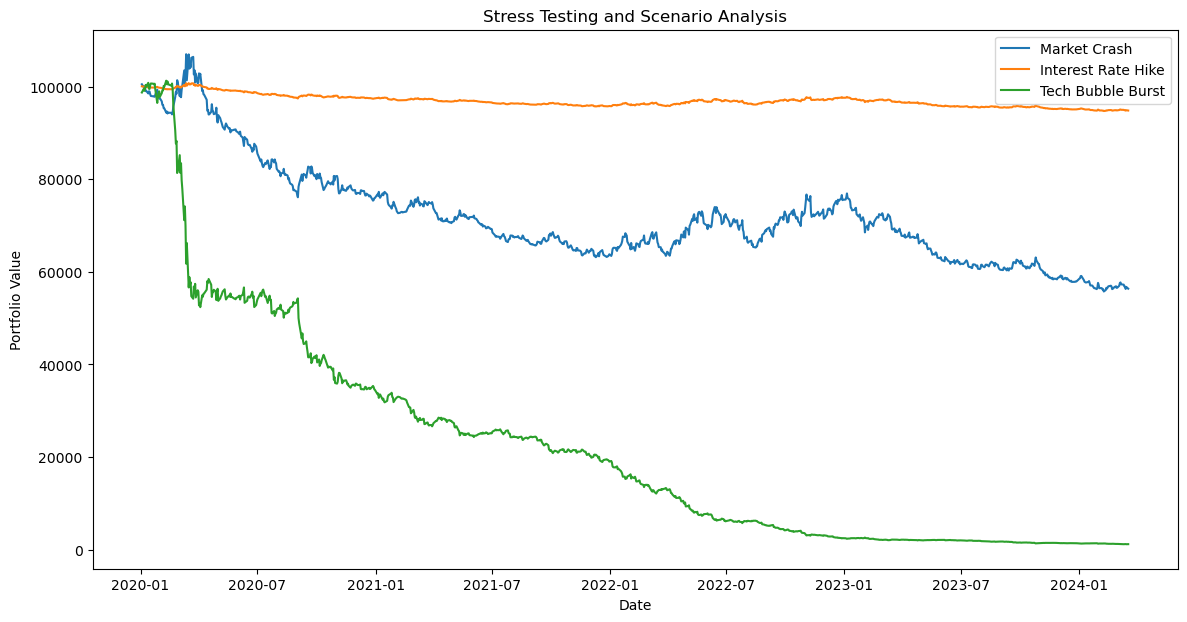

In [32]:
# Visualizing the scenario analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for scenario in stressed_portfolio_values:
    plt.plot(stressed_portfolio_values_df[scenario], label=scenario)
plt.title('Stress Testing and Scenario Analysis')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()
